## Caso de Estudio: Movielens

Movielens es una conjunto de datos de películas creada por la Universidad de Minnesota.

Los datos se pueden descargar en el siguiente enlace:
* http://grouplens.org/datasets/movielens/20m/

El conjunto de datos *MovieLens 20M Dataset* contiene:
* 20 millones de evaluaciones de peliculas (ratings.csv)
* 465.000 tags (tags.csv)
* 27.000 películas (movies.csv)
* 138.000 usuarios

Una vez completada la descarga debe descomprimir el fichero ml-20m.zip en el directorio datasets y renombrar el subdirectorio como movielens (../datasets/movielens)

In [1]:
import pandas as pd
import numpy as np

Importar los Datos con *Pandas*.

Vamos a trabajar con 3 ficheros CSV:
* **movies.csv :** *movieId*, *title*, *genres*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*

Timestamp (**Unix Time**) es el número de segundos transcurridos desde el 1 de Enero de 1970.


In [2]:
pwd

'c:\\Users\\pherm\\Documents\\GitHub\\aprendiz-data-science\\notebooks'

In [3]:
ls "../datasets/movielens"

 El volumen de la unidad C es Windows
 El número de serie del volumen es: 0020-6739

 Directorio de c:\Users\pherm\Documents\GitHub\aprendiz-data-science\datasets\movielens

06/04/2018  10:43    <DIR>          .
06/04/2018  10:43    <DIR>          ..
06/04/2018  10:42       323.544.381 genome-scores.csv
06/04/2018  10:42            18.103 genome-tags.csv
06/04/2018  09:36                 2 intro
06/04/2018  10:42           570.090 links.csv
06/04/2018  10:42         1.397.542 movies.csv
06/04/2018  10:42       533.444.411 ratings.csv
06/04/2018  10:42            10.261 README.txt
06/04/2018  10:42        16.603.996 tags.csv
               8 archivos    875.588.786 bytes
               2 dirs  633.730.719.744 bytes libres


In [4]:
movies = pd.read_csv('../datasets/movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
tags = pd.read_csv('../datasets/movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv('../datasets/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [7]:
# Borraremos la columna timestamp para el análisis inicial
del ratings['timestamp']
del tags['timestamp']

## Data Structures

In [8]:
ratings.tail()

,userId,movieId,rating
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


### Series

In [9]:
# Extraer la Fila 0

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [10]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [11]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [12]:
row_0['userId']

18

In [13]:
'tag' in row_0

True

In [14]:
row_0.name

0

In [15]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [16]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


### DataFrames

In [17]:
tags.head(8)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
5,65,668,bollywood
6,65,898,screwball comedy
7,65,1248,noir thriller


In [18]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [19]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [20]:
# Extraer la Fila 0, 11 y 2000

tags.iloc[ [0,11,2000] ]
tags.iloc[ [0,11] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller


### Estadística Descriptiva

Vamos a describir las características de este conjunto de datos mediante medidas resumen, tablas o gráficos.

In [21]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [22]:
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,20000263.0,69045.872583,40038.626653,1.0,34395.0,69141.0,103637.0,138493.0
movieId,20000263.0,9041.567330,19789.477445,1.0,902.0,2167.0,4770.0,131262.0
rating,20000263.0,3.525529,1.051989,0.5,3.0,3.5,4.0,5.0


In [23]:
ratings['rating'].mean()

3.5255285642993797

In [24]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [25]:
ratings['rating'].min()

0.5

In [26]:
ratings['rating'].max()

5.0

In [27]:
ratings['rating'].std()

1.051988919275684

In [28]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [29]:
# El cálculo de la Correlación no tiene sentido en este Dataset
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [30]:
filter_1 = ratings['rating'] > 5
filter_1
filter_1.any()

False

In [31]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

### Limpieza de los datos: gestionando datos inexistentes

In [32]:
movies.shape

(27278, 3)

In [33]:
movies.iloc[0]

movieId                                              1
title                                 Toy Story (1995)
genres     Adventure|Animation|Children|Comedy|Fantasy
Name: 0, dtype: object

In [34]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [35]:
ratings.shape
#ratings.columns

(20000263, 3)

In [36]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [37]:
tags.shape
#tags.columns

(465564, 3)

In [38]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [39]:
# Eliminar valores nulos en tags
tags = tags.dropna()

In [40]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [41]:
tags.shape

(465548, 3)

### Visualización de Datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F0110BDD8>]],
      dtype=object)

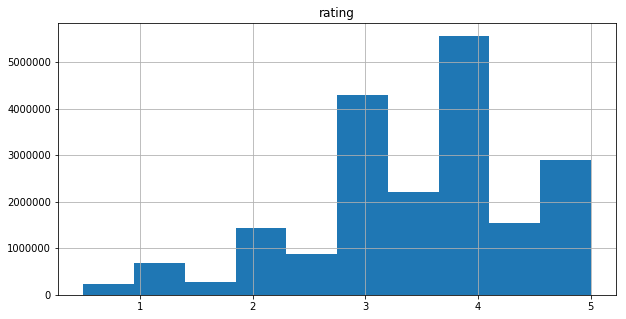

In [42]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

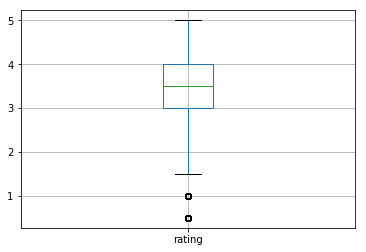

In [43]:
ratings.boxplot(column='rating')

In [44]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Selección de Datos
 

In [45]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [46]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [47]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [48]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

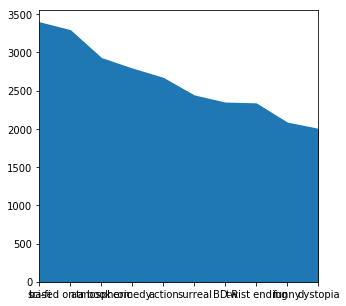

In [49]:
tag_counts[:10].plot(kind='area', figsize=(5,5))

### Filtrado de Datos (selección de filas)

In [50]:
is_highly_rated = ratings['rating'] >= 4.0
ratings[is_highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [51]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
is_animation = movies['genres'].str.contains('Animation')
is_adventure = movies['genres'].str.contains('Adventure')
movies[is_animation][5:15]

,movieId,title,genres
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
588,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
590,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
604,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [53]:
is_adventure = movies['genres'].str.contains('Adventure')
movies[is_adventure][5:15]

,movieId,title,genres
14,15,Cutthroat Island (1995),Action|Adventure|Romance
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
32,33,Wings of Courage (1995),Adventure|Romance|IMAX
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
52,53,Lamerica (1994),Adventure|Drama
55,56,Kids of the Round Table (1995),Adventure|Children|Fantasy
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
85,86,White Squall (1996),Action|Adventure|Drama
93,95,Broken Arrow (1996),Action|Adventure|Thriller
99,101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance


In [54]:
movies[is_animation & is_adventure].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


### Agrupación y Agregación de Datos

In [55]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [60]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [62]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [58]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [59]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [ ]:
movie_new = ratings[['movieId', 'rating']].groupby('movieId').agg({'rating':np.mean, 'movieId': np.size})

In [63]:
movie_new = ratings.groupby(['movieId', 'rating']).agg({'rating': [np.mean, np.size]})

In [64]:
movie_new.head(20)

rating         
                 mean     size
movieId rating                
1       0.5       0.5    178.0
        1.0       1.0    506.0
        1.5       1.5    266.0
        2.0       2.0   1440.0
        2.5       2.5   1060.0
        3.0       3.0   8751.0
        3.5       3.5   4200.0
        4.0       4.0  17136.0
        4.5       4.5   3890.0
        5.0       5.0  12268.0
2       0.5       0.5    211.0
        1.0       1.0    708.0
        1.5       1.5    429.0
        2.0       2.0   2227.0
        2.5       2.5   1532.0
        3.0       3.0   7598.0
        3.5       3.5   2266.0
        4.0       4.0   5156.0
        4.5       4.5    452.0
        5.0       5.0   1664.0

### Combinación de Dataframes

In [65]:
print(tags.count())
tags.head()

userId     465548
movieId    465548
tag        465548
dtype: int64


,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [66]:
print(movies.count())
movies.head()

movieId    27278
title      27278
genres     27278
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [67]:
t = movies.merge(tags, on='movieId',  )
t.head()


,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


Otros Ejemplos: http://pandas.pydata.org/pandas-docs/stable/merging.html

### Análisis de Datos combinando Agregación, Combinación y Filtrado

In [68]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
#print(avg_ratings.count())
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


movieId    26744
rating     26744
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F01B5D2B0>]],
      dtype=object)

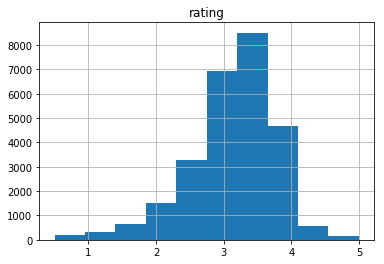

In [69]:
print(avg_ratings.count())
avg_ratings.hist('rating')

In [70]:
print(movies.count())
movies.head()

movieId    27278
title      27278
genres     27278
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
print(avg_ratings.count())
avg_ratings.head()

movieId    26744
rating     26744
dtype: int64


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [72]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [73]:
is_highly_rated = box_office['rating'] >= 4.0
box_office.count()

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [74]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [75]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


### Operaciones con Strings

In [76]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Dividir Generos en múltiples columnas

In [77]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [78]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


### Añadir una columna para indicar si la película es una Comedia

In [79]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [80]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


### Extraer el Año del Título de la película

In [81]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
type(movies['title'])

pandas.core.series.Series

In [101]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
#movies['year'] = movies['title'].str.extract('.*\(([0-9]+)\).*', expand=True)

In [102]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


Más operaciones con Strings:


http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods

### Analizando Fechas en formato Unix

La fecha en formato Unix es muy utilizada en IoT (datos de sensores y otras series temporales)

In [103]:
tags = pd.read_csv('../datasets/movielens/tags.csv', sep=',')

In [104]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [105]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [106]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [107]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


### Selección de filas filtrando por fecha

In [108]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

selected_rows.head()
#tags.shape, selected_rows.shape

,userId,movieId,tag,timestamp,parsed_time
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03


### Ordenación de filas por fecha

In [109]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


## Analizando la calificación de las películas en función del año

In [110]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [111]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [112]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[-20:]

,year,rating
104,2000,3.074608
105,2001,3.085092
106,2002,3.075135
107,2003,3.127879
108,2004,3.171965
109,2005,3.103949
110,2006,3.163678
111,2007,3.130010
112,2007-,3.421687
113,2008,3.157557


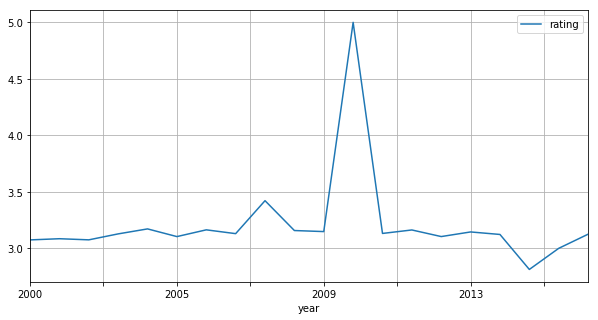

In [113]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(10,5), grid=True)

In [114]:
yearly_average[yearly_average['year'].str.contains('2009')]

,year,rating
114,2009,3.148238
115,2009–,5.000000


In [119]:
err_movies = movies['year'].str.contains('2009–')
err_movies.any()

True

In [120]:
movies[err_movies == True]

,movieId,title,genres,year
22368,107434,Diplomatic Immunity (2009– ),Comedy,2009–


In [117]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [118]:
ratings[ratings['movieId'] == 107434]

,userId,movieId,rating
8833091,61050,107434,5.0
